<a href="https://www.kaggle.com/code/nithunith/predict-pet-adoption-ml?scriptVersionId=184851812" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-pet-adoption-status-dataset/pet_adoption_data.csv


# General Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns


# Train csv file

In [4]:
train_csv = pd.read_csv("/kaggle/input/predict-pet-adoption-status-dataset/pet_adoption_data.csv")
train_csv

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,2502,Dog,Poodle,72,Orange,Small,27.039045,1,0,66,26,1,1
2003,2503,Rabbit,Rabbit,124,Brown,Small,4.726954,1,1,59,150,0,0
2004,2504,Rabbit,Rabbit,113,Orange,Small,1.758592,1,0,68,302,0,0
2005,2505,Dog,Labrador,12,Gray,Large,20.961592,1,0,59,478,0,0


# EDA

In [5]:
train_csv.isnull()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,False,False,False,False,False,False,False,False,False,False,False,False,False
2003,False,False,False,False,False,False,False,False,False,False,False,False,False
2004,False,False,False,False,False,False,False,False,False,False,False,False,False
2005,False,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

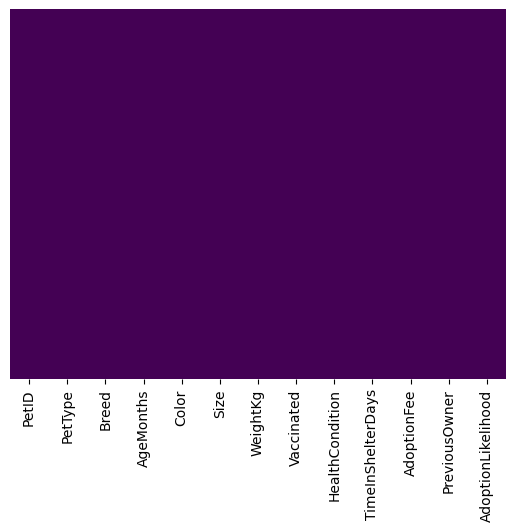

In [6]:
sns.heatmap(train_csv.isnull(),yticklabels=False,cbar=False,cmap='viridis')   #No null values are present

<Axes: xlabel='AdoptionLikelihood', ylabel='count'>

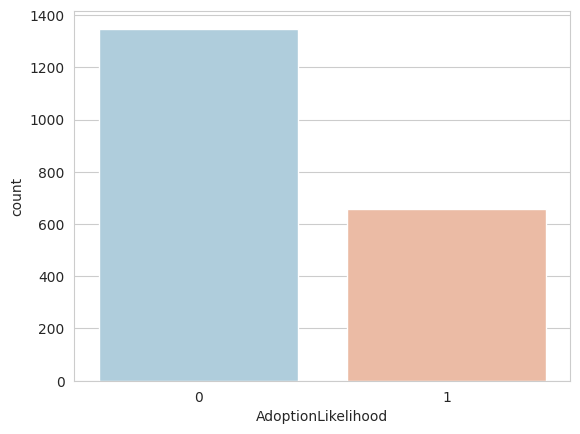

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='AdoptionLikelihood',data=train_csv,palette='RdBu_r')

In [8]:
train_csv["AdoptionLikelihood"].value_counts()

AdoptionLikelihood
0    1348
1     659
Name: count, dtype: int64

## Since the id in AdoptionLikelihood is imbalance we are resampleing the data

In [9]:
from sklearn.utils import resample
One_class=train_csv[train_csv["AdoptionLikelihood"]==1]
Zero_class=train_csv[train_csv["AdoptionLikelihood"]==0]
One_new=resample(One_class,replace=True,n_samples=1328,random_state=42)

In [10]:
df_new=pd.concat([Zero_class,One_new])

In [11]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2676 entries, 0 to 1527
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetID               2676 non-null   int64  
 1   PetType             2676 non-null   object 
 2   Breed               2676 non-null   object 
 3   AgeMonths           2676 non-null   int64  
 4   Color               2676 non-null   object 
 5   Size                2676 non-null   object 
 6   WeightKg            2676 non-null   float64
 7   Vaccinated          2676 non-null   int64  
 8   HealthCondition     2676 non-null   int64  
 9   TimeInShelterDays   2676 non-null   int64  
 10  AdoptionFee         2676 non-null   int64  
 11  PreviousOwner       2676 non-null   int64  
 12  AdoptionLikelihood  2676 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 292.7+ KB


In [12]:
df_new.head()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


In [13]:
#PetID is not required
df_new.drop("PetID",axis=1, inplace = True)

In [17]:
df_new.head()

,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


In [23]:
#finding the numerical and categorical data

numerical_col = []
categorical_col = []
for features in df_new.columns:
    if train_csv[features].dtype!="object":
        numerical_col.append(features)
    else:
        categorical_col.append(features)
        
print(f"Numerical {numerical_col} \n Categorical {categorical_col}")

Numerical ['AgeMonths', 'WeightKg', 'Vaccinated', 'HealthCondition', 'TimeInShelterDays', 'AdoptionFee', 'PreviousOwner', 'AdoptionLikelihood'] 
 Categorical ['PetType', 'Breed', 'Color', 'Size']


In [26]:
#finding the continuous and the discrete data
continuous_feat = []
discrete_feat = []
for feature in numerical_col:
    if len(df_new[feature].unique())<=20:
        discrete_feat.append(feature)
    else:
        continuous_feat.append(feature)
        
print(f"discrete_feat {discrete_feat} \n continuous {continuous_feat}")

discrete_feat ['Vaccinated', 'HealthCondition', 'PreviousOwner', 'AdoptionLikelihood'] 
 continuous ['AgeMonths', 'WeightKg', 'TimeInShelterDays', 'AdoptionFee']


[]

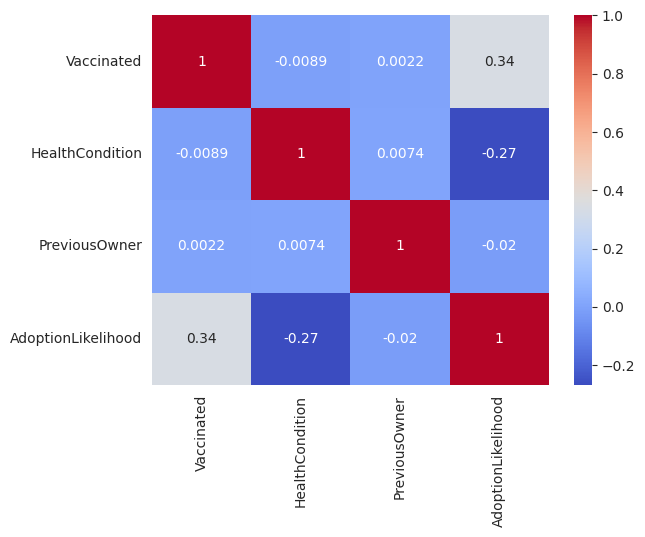

In [28]:
#heatmap plotting --- for plotting the discrete feat
matrix = df_new[discrete_feat].corr()
sns.heatmap(matrix,cmap="coolwarm",annot=True)
plt.plot()

[]

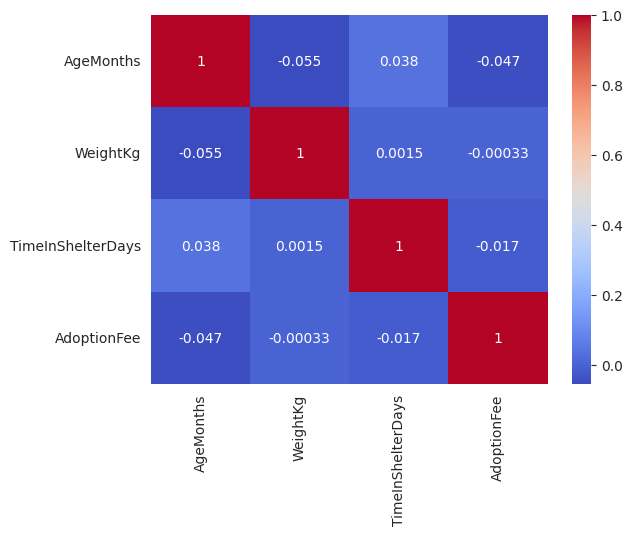

In [29]:
#heatmap plotting --- for plotting the continuous feat
matrix = df_new[continuous_feat].corr()
sns.heatmap(matrix,cmap="coolwarm",annot=True)
plt.plot()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


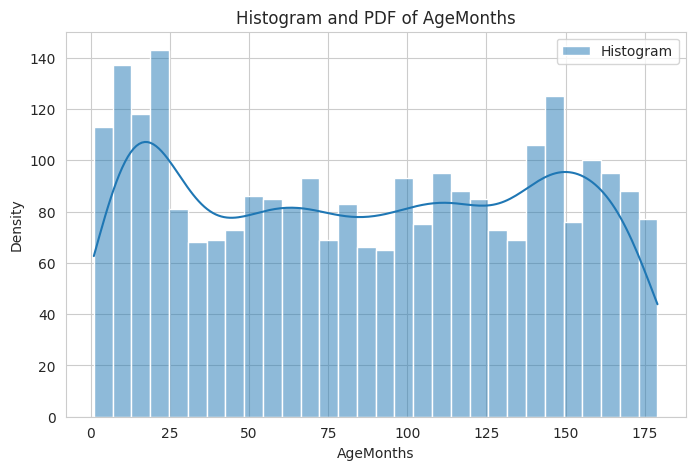

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


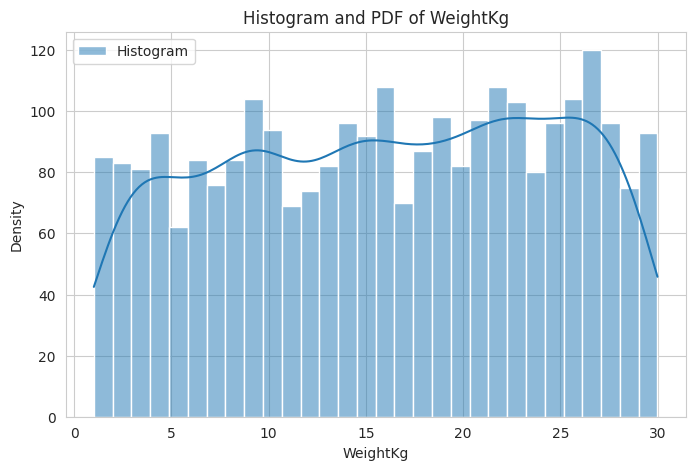

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


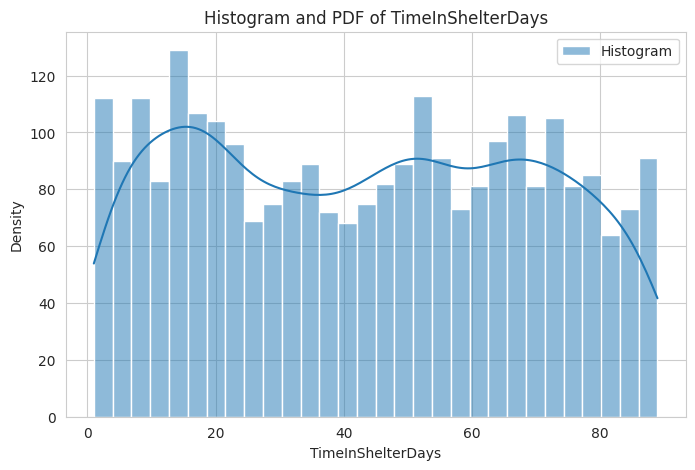

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


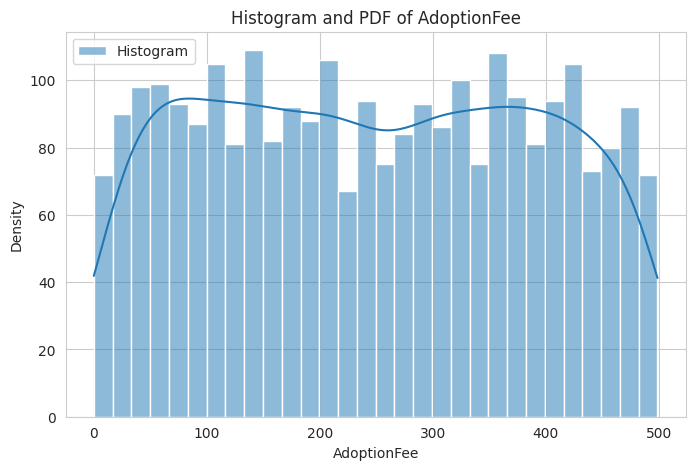

In [30]:
#plotting the histogram plot 
for feature in continuous_feat:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_new[feature], kde=True, bins=30, label='Histogram')
    plt.title(f'Histogram and PDF of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

In [31]:
from scipy.stats import yeojohnson, skew
for feature in continuous_feat:
    print(f"{feature} has skewness of {skew(df_new[feature])}")



AgeMonths has skewness of 0.012020466427073688
WeightKg has skewness of -0.09604891874900093
TimeInShelterDays has skewness of 0.04540526440226573
AdoptionFee has skewness of 0.028174612050544053


AgeMonths skewness = 0.012020466427073688: This is very close to zero, indicating a very slight positive skew, but it is nearly symmetric.

WeightKg skewness = -0.09604891874900093: This is also close to zero, indicating a very slight negative skew, but it is nearly symmetric.

TimeInShelterDays skewness = 0.04540526440226573: This is very close to zero, indicating a very slight positive skew, but it is nearly symmetric.

AdoptionFee skewness = 0.028174612050544053: This is very close to zero, indicating a very slight positive skew, but it is nearly symmetric.

<Axes: >

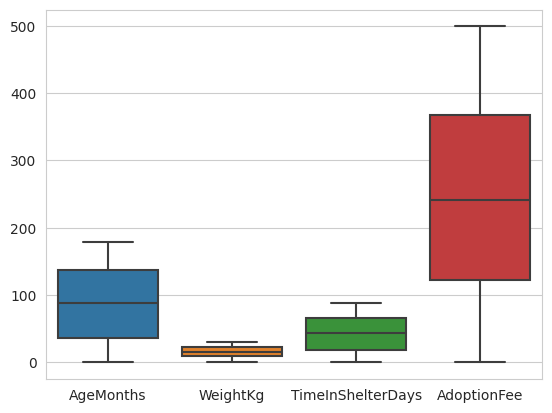

In [33]:
sns.boxplot(df_new[continuous_feat])

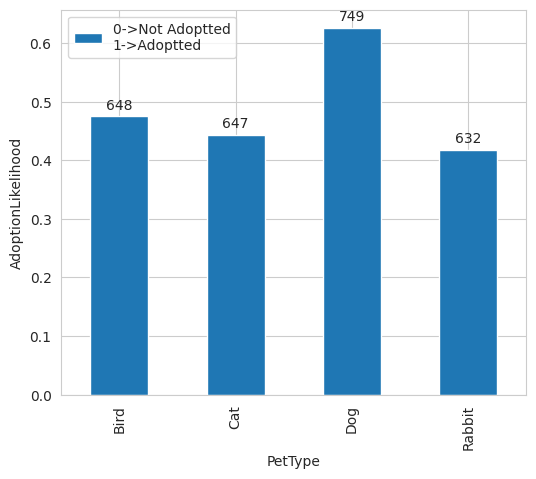

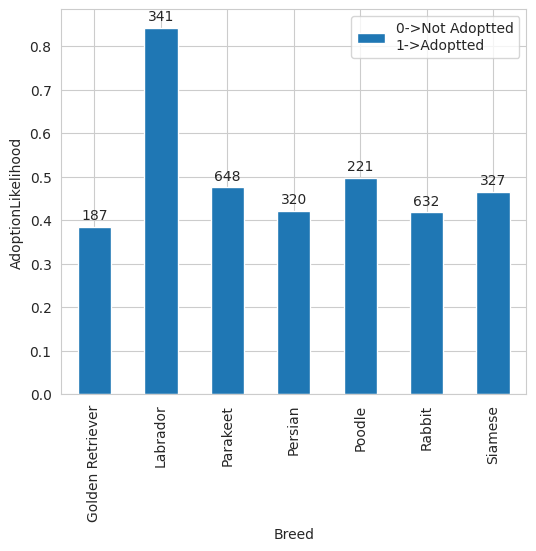

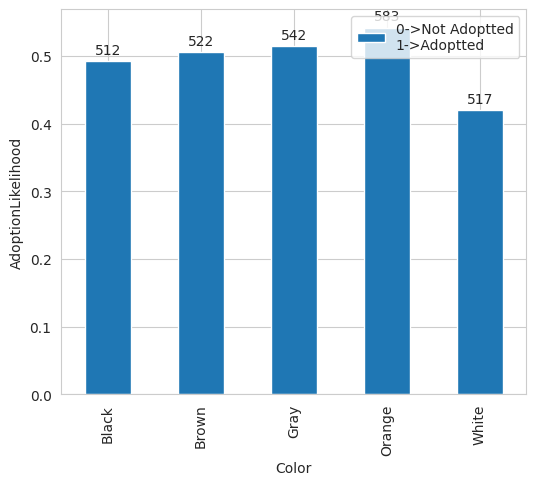

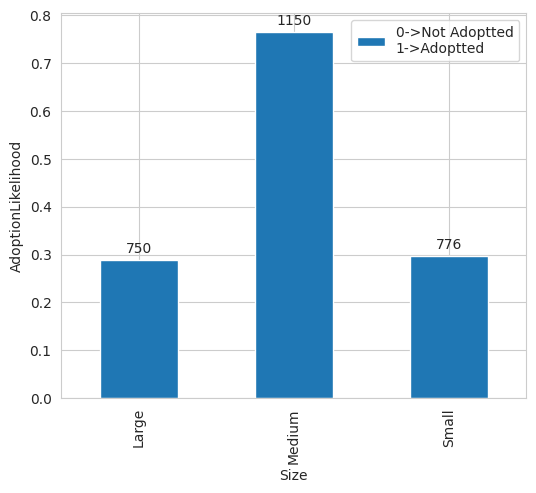

In [36]:
for feature in categorical_col:
    plt.figure(figsize=(6,5))
    grouped_data = df_new.groupby(feature)['AdoptionLikelihood'].agg(['mean', 'count'])
    ax = grouped_data['mean'].plot.bar()

    for idx, (mean, count) in enumerate(zip(grouped_data['mean'], grouped_data['count'])):
        ax.annotate(f'{count}', xy=(idx, mean), xytext=(0, 3), 
                    textcoords='offset points', ha='center', va='bottom')

    plt.xlabel(feature)
    plt.ylabel("AdoptionLikelihood")
    plt.legend([f"0->Not Adoptted\n1->Adoptted"])
    plt.show()



In [34]:
df_new.head()

,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


## Needed to convert the categorical data into the numerical one </br> Using sklearn preprocessing "LabelEncoder" class

In [42]:
categorical_col

['PetType', 'Breed', 'Color', 'Size']

In [37]:
from sklearn.preprocessing import LabelEncoder

In [39]:
#color
le = LabelEncoder()
df_new['Color'] = le.fit_transform(df_new['Color'])

In [43]:
#pettype
le1 = LabelEncoder()
df_new['PetType'] = le1.fit_transform(df_new['PetType'])

In [44]:
#breed
le2 = LabelEncoder()
df_new['Breed'] = le2.fit_transform(df_new['Breed'])

In [45]:
#size
le3 = LabelEncoder()
df_new['Size'] = le3.fit_transform(df_new['Size'])
# Get the mapping of categorical elements to numerical values
mapping = dict(zip(le3.classes_, le3.transform(le3.classes_)))
print("Mapping of categorical elements to numerical values:")
print(mapping)

Mapping of categorical elements to numerical values:
{'Large': 0, 'Medium': 1, 'Small': 2}


In [49]:
mapping = dict(zip(le2.classes_, le2.transform(le2.classes_)))
print("Mapping of categorical elements to numerical values:")
print(mapping)

Mapping of categorical elements to numerical values:
{'Golden Retriever': 0, 'Labrador': 1, 'Parakeet': 2, 'Persian': 3, 'Poodle': 4, 'Rabbit': 5, 'Siamese': 6}


In [46]:
#final_dataframe
df_new

,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,0,2,131,3,0,5.039768,1,0,27,140,0,0
1,3,5,73,4,0,16.086727,0,0,8,235,0,0
2,2,0,136,3,1,2.076286,0,0,85,385,0,0
3,0,2,97,4,2,3.339423,0,0,61,217,1,0
4,3,5,123,2,0,20.498100,0,0,28,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1320,2,4,30,2,1,4.032323,1,0,19,77,0,1
1908,3,5,48,3,0,18.391428,1,0,53,491,0,1
141,2,1,12,3,0,6.480584,1,0,17,127,1,1
115,1,6,20,1,2,26.441982,1,0,66,254,0,1


In [47]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2676 entries, 0 to 1527
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetType             2676 non-null   int64  
 1   Breed               2676 non-null   int64  
 2   AgeMonths           2676 non-null   int64  
 3   Color               2676 non-null   int64  
 4   Size                2676 non-null   int64  
 5   WeightKg            2676 non-null   float64
 6   Vaccinated          2676 non-null   int64  
 7   HealthCondition     2676 non-null   int64  
 8   TimeInShelterDays   2676 non-null   int64  
 9   AdoptionFee         2676 non-null   int64  
 10  PreviousOwner       2676 non-null   int64  
 11  AdoptionLikelihood  2676 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 271.8 KB


In [48]:
# now all the columns are in numerical form

# Test Train Split

In [14]:
from sklearn.model_selection import train_test_split

In [50]:
df_new.columns

Index(['PetType', 'Breed', 'AgeMonths', 'Color', 'Size', 'WeightKg',
       'Vaccinated', 'HealthCondition', 'TimeInShelterDays', 'AdoptionFee',
       'PreviousOwner', 'AdoptionLikelihood'],
      dtype='object')

In [51]:
X=df_new.drop("AdoptionLikelihood",axis=1)
Y=df_new["AdoptionLikelihood"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.20)
    

In [55]:
X_train.shape , X_test.shape

((2140, 11), (536, 11))

## Logestic Regression

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
predictions = logmodel.predict(X_test)

## Evaluation

In [59]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.68      0.70       263
           1       0.71      0.76      0.73       273

    accuracy                           0.72       536
   macro avg       0.72      0.72      0.72       536
weighted avg       0.72      0.72      0.72       536

